In [202]:
import seaborn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [203]:
df = pd.read_csv(f'./output/modelscores.csv')
df

,Unnamed: 0,model,daynum,feature,target,error
0,0,LinearRegression(),0,allfeatures,Max_temp,-0.208605
1,1,LinearRegression(),0,onlytempfeatures,Max_temp,-0.210488
2,2,LinearRegression(),0,wind_rainfeatures,Max_temp,-0.877428
3,3,LinearRegression(),0,allfeatures,Min_temp,-0.179761
4,4,LinearRegression(),0,onlytempfeatures,Min_temp,-0.187652
...,...,...,...,...,...,...
211,211,"MLPRegressor(max_iter=1500, solver='sgd')",7,onlytempfeatures,Min_temp,-0.200629
212,212,"MLPRegressor(max_iter=1500, solver='sgd')",7,wind_rainfeatures,Min_temp,-0.815210
213,213,"MLPRegressor(max_iter=1500, solver='sgd')",7,allfeatures,Mean_temp,-0.202918
214,214,"MLPRegressor(max_iter=1500, solver='sgd')",7,onlytempfeatures,Mean_temp,-0.193558


In [204]:
print("Now inspecting individual NMAE means of certain features, and targets:")
print("\n")


fields = {'model', 'daynum', 'feature', 'target'}

for field in fields:
    allcrit = np.unique(df[field])

    errv = {}
    for crit in allcrit:
        errv[crit] = df.set_index(field).filter(regex=str(crit), axis=0)['error'].mean()
        #print(num)
        print("Mean NMAE in case of: " + str(crit) + "\twhen comparing different " + field + "s: \t" + str(errv[crit]))
    errvlowest = errv[min(errv, key=errv.get)]
    #print(errvlowest)
    #print(list(errv.values()))
    #print(list(errv.values()).index(errvlowest))
    print("Absolute lowest: " + str(errvlowest) + " which corresponds to: " + str(allcrit[list(errv.values()).index(errvlowest)]))
    print("\n")

Now inspecting individual NMAE means of certain features, and targets:


Mean NMAE in case of: allfeatures	when comparing different features: 	-0.19517869822598588
Mean NMAE in case of: onlytempfeatures	when comparing different features: 	-0.19786338691702554
Mean NMAE in case of: wind_rainfeatures	when comparing different features: 	-0.8464473099377081
Absolute lowest: -0.8464473099377081 which corresponds to: wind_rainfeatures


Mean NMAE in case of: 0	when comparing different daynums: 	-0.42498430308998575
Mean NMAE in case of: 1	when comparing different daynums: 	-0.41875535469448977
Mean NMAE in case of: 2	when comparing different daynums: 	-0.4147350024385294
Mean NMAE in case of: 3	when comparing different daynums: 	-0.4120802833847693
Mean NMAE in case of: 4	when comparing different daynums: 	-0.4099469826339745
Mean NMAE in case of: 5	when comparing different daynums: 	-0.40918998167226306
Mean NMAE in case of: 6	when comparing different daynums: 	-0.4083664318819637
Mean NMAE

In [205]:
def ComparisonPlots(usedmodel, ycommonticks, colcontent, rowcontent):
    # note: uses df which is in global var
    
    cols = len(np.unique(df[colcontent])) # every target variable is in a different column
    rows = len(np.unique(df[rowcontent]))
    total = cols*rows

    currplot = 1
    fig = plt.figure(1)
    st = fig.suptitle("suptitle", fontsize="x-large")

    for irow in range(rows):
        for icol in range(cols):
            #print(np.unique(df['target'])[icol])
            #print(np.unique(df['feature'])[irow])
            ax = fig.add_subplot(rows,cols,currplot)
            x = range(8)
            temp = df.set_index('model').filter(regex=usedmodel, axis=0)
            #print(temp)
            temp = temp.set_index(rowcontent).filter(regex=np.unique(df[rowcontent])[irow], axis=0)
            #print(temp)
            temp = temp.set_index(colcontent).filter(regex=np.unique(df[colcontent])[icol], axis=0)
            #print(temp)
            y = temp.iloc[:,-1].values # error values from daysnum 0 to 7
            ax.plot(x,y,color='green',linewidth=3)
            ax.set_xticks(range(8), minor=False)
            ticks = ycommonticks[np.unique(df[rowcontent])[irow]]
            #print(ticks)
            ax.set_yticks(np.linspace(ticks[0],ticks[1],5), minor=False)
            if icol%len(np.unique(df[colcontent])) != 0:
                ax.set_yticklabels([])
            else:
                ax.set_ylabel(np.unique(df[rowcontent])[irow])
            #
            if irow+1 == len(np.unique(df[rowcontent])):
                ax.set_xlabel("daysnum")
            ax.grid()
            currplot = currplot+1
            
    
    fig.set_figheight(12)
    fig.set_figwidth(12)
    fig.tight_layout()

    st.set_y(0.95) # shift down
    # fig.subplots_adjust(top=0.85) # more shift down
    fig.suptitle("Comparison of NMAE values for model " + usedmodel, fontsize=14)

    plt.show()
    
    

In [206]:
# for each model:
rowcontent = 'feature'
colcontent = 'target'

#print(np.unique(df['model']))


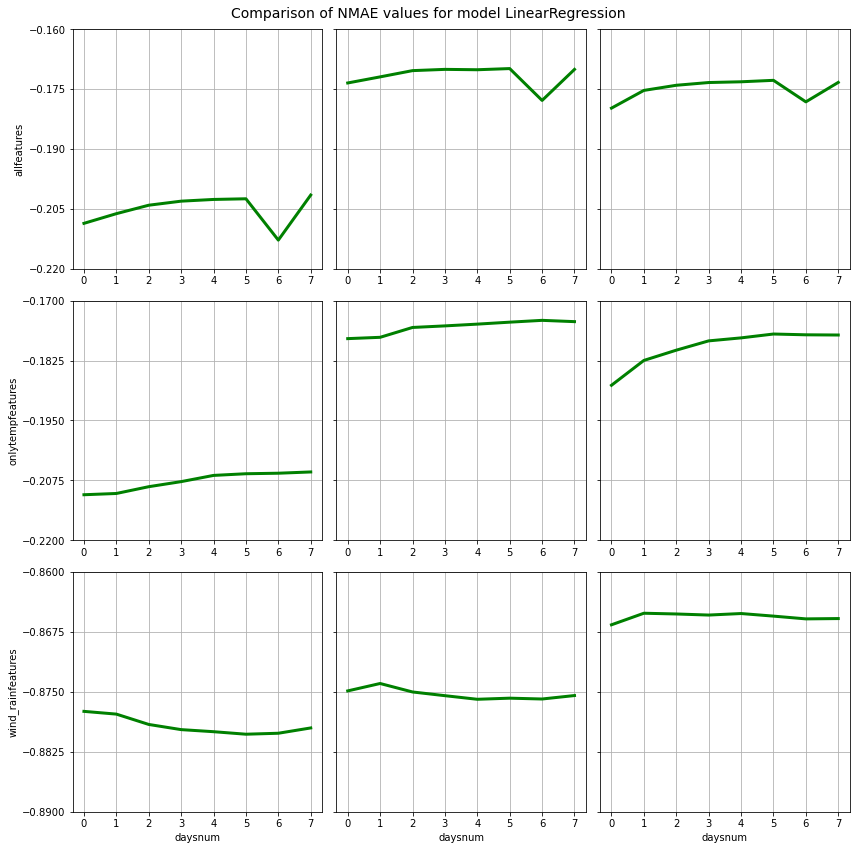

In [207]:
usedmodel = "LinearRegression" # note: not "..regressor" but "...regression" !
# works width: rowcontent = 'feature'
ycommonticks = {} # every elem corresponds to a row
ycommonticks["allfeatures"] = [-0.160,-0.220]
ycommonticks["onlytempfeatures"] = [-0.170,-0.220]
ycommonticks["wind_rainfeatures"] = [-0.860,-0.890]
ComparisonPlots(usedmodel, ycommonticks, colcontent, rowcontent)

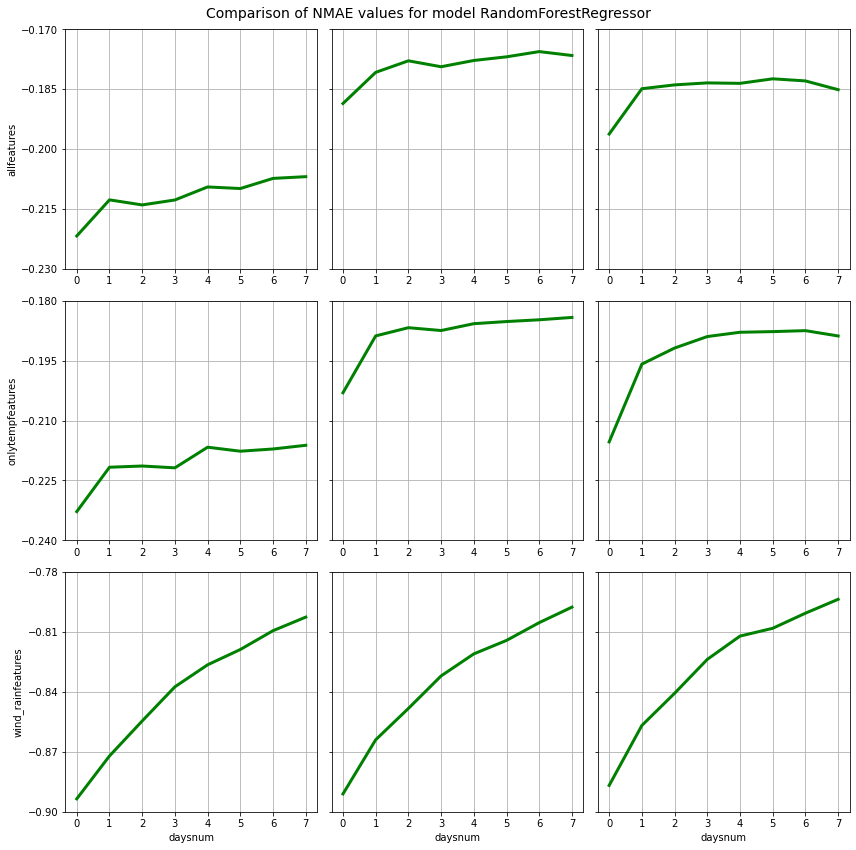

In [208]:
usedmodel = "RandomForestRegressor"
# works width: rowcontent = 'feature'
ycommonticks = {} # every elem corresponds to a row
ycommonticks["allfeatures"] = [-0.170,-0.230]
ycommonticks["onlytempfeatures"] = [-0.180,-0.240]
ycommonticks["wind_rainfeatures"] = [-0.780,-0.900]
ComparisonPlots(usedmodel, ycommonticks, colcontent, rowcontent)

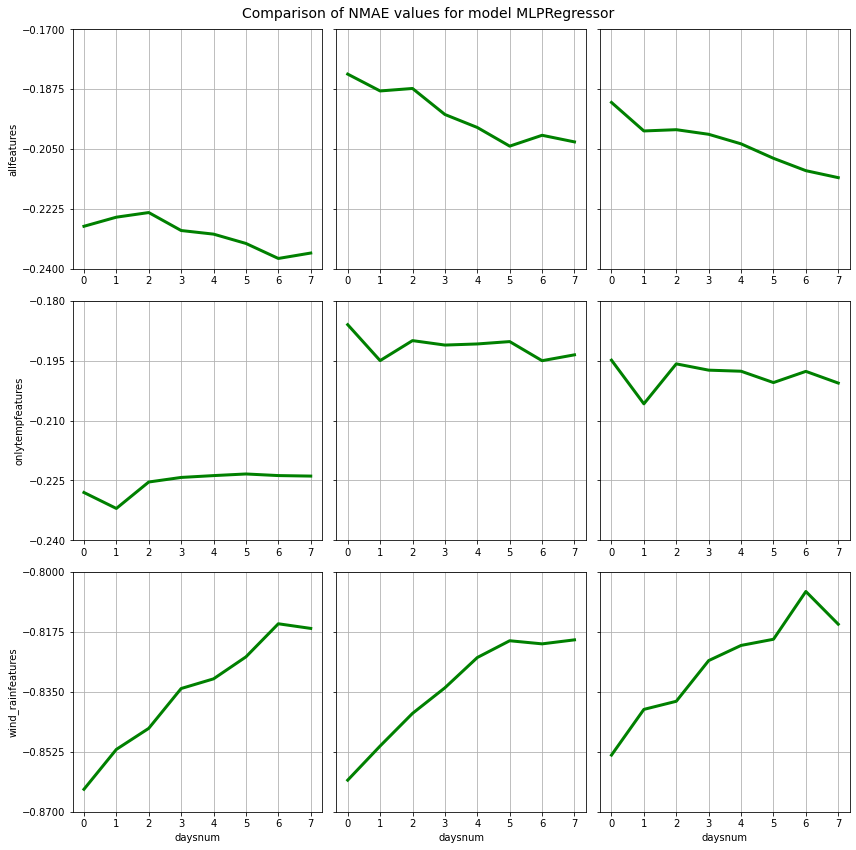

In [209]:
usedmodel = "MLPRegressor"
# works width: rowcontent = 'feature'
ycommonticks = {} # every elem corresponds to a row
ycommonticks["allfeatures"] = [-0.170,-0.240]
ycommonticks["onlytempfeatures"] = [-0.180,-0.240]
ycommonticks["wind_rainfeatures"] = [-0.800,-0.870]
ComparisonPlots(usedmodel, ycommonticks, colcontent, rowcontent)